In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
import cv2
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt

In [ ]:
def model_cnn(name_model):
    if name_model=='resnet':
        model=ResNet50(weights='imagenet',
                       include_top=False,
                       input_shape=(224, 224, 3),
                       pooling='max')
    else:
        print('khong co mo hinh nao duoc chon')
    return model

model=model_cnn('resnet')

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
def extract_feat(img, model):
  feature = model.predict(img)
  img_id = list(range(0, len(list_img)))
  data = {"img_id": img_id, "feature": feature}
  try:
     f = open("res_feats_data.pkl", "wb")
     f.write(pickle.dumps(data))
     f.close()
     print("luu thanh cong")
  except Exception as e:
     print("Error : {}".format(e))

In [ ]:
list_img=[]
for img_path in os.listdir('/content/gdrive/MyDrive/data_train'):
  for i in os.listdir('/content/gdrive/MyDrive/data_train/'+img_path):
     img = image.load_img('/content/gdrive/MyDrive/data_train/'+img_path+'/'+i, target_size=(224, 224))
     img = image.img_to_array(img)
     img = np.expand_dims(img, axis=0)
     list_img.append(img)
list_img = np.array(list_img)
#list_img = list_img.astype('float32')/255
list_img= list_img.squeeze()

In [ ]:
extract_feat(list_img, model)

luu thanh cong


In [ ]:
index = pickle.loads(open("res_feats_data.pkl", "rb").read())
print(index['img_id'][10], " : ", index['feature'][10])
print(len(index['img_id']))

10  :  [4.830404  4.5271225 3.6111734 ... 1.1860352 5.45257   9.827046 ]
4143


In [ ]:
def extract_feat_q(img, model):
  feature = model.predict(img)
  img_id = list(range(0, len(test_list_img)))
  data = {"img_id": img_id, "feature": feature}
  try:
     f = open("res_feat_data.pkl", "wb")
     f.write(pickle.dumps(data))
     f.close()
     print("luu thanh cong")
  except Exception as e:
     print("Error : {}".format(e))

In [ ]:
test_list_img=[]
for img_path in os.listdir('/content/gdrive/MyDrive/data_test'):
  for i in os.listdir('/content/gdrive/MyDrive/data_test/'+img_path):
     img = image.load_img('/content/gdrive/MyDrive/data_test/'+img_path+'/'+i, target_size=(224, 224))
     img = image.img_to_array(img)
     img = np.expand_dims(img, axis=0)
     test_list_img.append(img)
test_list_img = np.array(test_list_img)
#test_list_img = test_list_img.astype('float32')/255
test_list_img= test_list_img.squeeze()

In [ ]:
extract_feat_q(test_list_img, model)

luu thanh cong


In [ ]:
query_img = pickle.loads(open("res_feat_data.pkl", "rb").read())
print(query_img['img_id'][10], " : ", query_img['feature'][10])
a=query_img['feature'][0]
print(a.shape)

10  :  [4.246418   4.6474495  0.         ... 6.926114   0.31138515 9.148961  ]
(2048,)


In [ ]:
#gan id cho anh trong data_train
train_img=[]
for img_path in os.listdir('/content/gdrive/MyDrive/data_train'):
  for i in os.listdir('/content/gdrive/MyDrive/data_train/'+img_path):
    img = image.load_img('/content/gdrive/MyDrive/data_train/'+img_path+'/'+i, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=-1)
    train_img.append(img)
train_img = np.array(train_img)
train_img = train_img.astype('float32')/255
train_img= train_img.squeeze()


In [ ]:
#gan id cho anh trong data_test
test_img=[]
for img_path in os.listdir('/content/gdrive/MyDrive/data_test'):
  for i in os.listdir('/content/gdrive/MyDrive/data_test/'+img_path):
    img = image.load_img('/content/gdrive/MyDrive/data_test/'+img_path+'/'+i, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=-1)
    test_img.append(img)
test_img = np.array(test_img)
test_img = test_img.astype('float32')/255
test_img= test_img.squeeze()

In [ ]:
#ham tinh khoang cach ơ clit
def euclidean_distance(v_query, v_img):
    return np.linalg.norm(v_query - v_img)

In [ ]:
def sort_dis(query, index, nearest):
    result = []
    for i in range(len(index['img_id'])):
      #luu khoang cach va id tuong ung cua anh vao mang
      result.append((euclidean_distance(query, index['feature'][i]), i))
    #sap xep ket qua thu duoc    
    return sorted(result)[:nearest]

In [ ]:
%matplotlib inline

def get_images(train_img, N, s):
    index = pickle.loads(open('res_feats_data.pkl', 'rb').read())
    query_img=pickle.loads(open('res_feat_data.pkl', 'rb').read())
    query_feat=query_img['feature'][s]
                                    
        
    images = []

    query_results = sort_dis(query_feat, index, nearest=N)

    for dist, id in query_results:
        img = (train_img[id]*255).astype('uint8')
        images.append(np.dstack([img]))
            
    #hien thi anh query
    print("anh query : ")
    query_img = (test_img[s]*255).astype('uint8')
    plt.imshow(query_img)
    plt.show()

    #hien thi cac anh giong voi anh query nhat
    print("Ket qua truy van: ")
    fig = plt.figure(figsize=(10, 10))
    for j in range(len(images)):
        fig.add_subplot(N//3+1, 3, j+1)
        plt.imshow(images[j])
    plt.show()

anh query : 


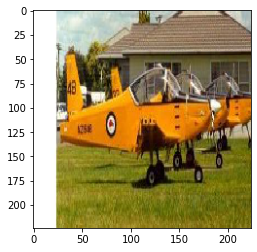

Ket qua truy van: 


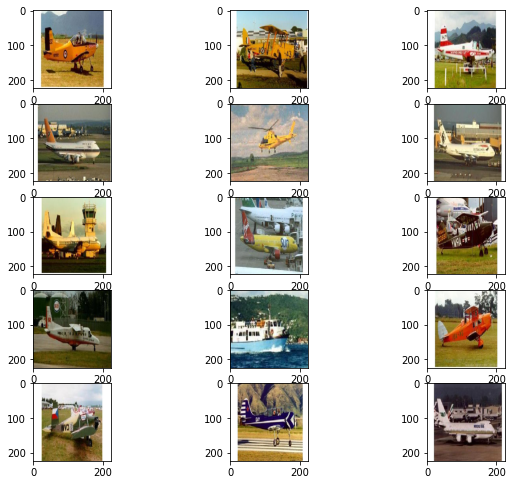

In [ ]:
get_images(train_img, 15, 0)

In [ ]:
#thuc hien phan cum
from sklearn.cluster import KMeans

X_train = pickle.loads(open("res_feats_data.pkl", "rb").read())
#X_train= X_train['feature']

X_test = pickle.loads(open("res_feat_data.pkl", "rb").read())
#X_test=X_test['feature']
kmeans = KMeans(n_clusters=55, random_state=0).fit(X_train['feature'])
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
label_train = kmeans.predict(X_train['feature'])
#kmeans_display(X, pred_label)
print(label_train)

Centers found by scikit-learn:
[[ 4.422898   9.324844   2.9217367 ...  6.6366553  6.5240083  6.377857 ]
 [ 2.0457804  5.2440314  2.8321443 ...  6.0107145  1.9541758  1.7789166]
 [ 8.441828   5.4500546  3.1981342 ...  4.93015    4.8433857  9.335966 ]
 ...
 [ 2.431012   9.108445   3.6033924 ...  3.2537005  5.682662   5.9345274]
 [ 2.9532998  6.216069   3.6434004 ...  3.0150356  5.0999193  3.0109317]
 [ 3.9236016 11.889011   2.471833  ...  4.7564216  3.1645222  4.5321856]]
[17 17 17 ...  6 51  5]


In [ ]:
label_test=kmeans.predict(X_test['feature'])
print(label_test)

[50  6 31 31 39  9  9  9  9 50 50 12 25 17 33]


In [ ]:
def get_img(train_img, nearest, s):
  a=[]
  result=[]
  images=[]
  for i in range(len(label_train)):
    if label_test[s]==int(kmeans.predict([X_train['feature'][i]])):
       a.append((X_train['feature'][i], X_train['img_id'][i]))
  for feature, id in a:
    dist = euclidean_distance(X_test['feature'][s], feature)
    result.append((id, dist))
    result=sorted(result)[:nearest]
  for id, dist in result:
    img = (train_img[id]*255).astype('uint8')
    images.append(np.dstack([img]))
  print("anh query : ")
  query_img = (test_img[s]*255).astype('uint8')
  plt.imshow(query_img)
  plt.show()
  
  #hien thi cac anh giong voi anh query nhat
  print("Ket qua truy van: ")
  fig = plt.figure(figsize=(10, 10))
  for j in range(len(images)):
    fig.add_subplot(nearest//3+1, 3, j+1)
    plt.imshow(images[j])
  plt.show()

anh query : 


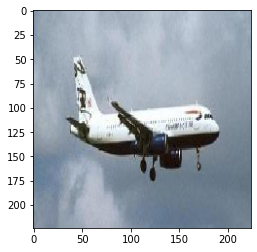

Ket qua truy van: 


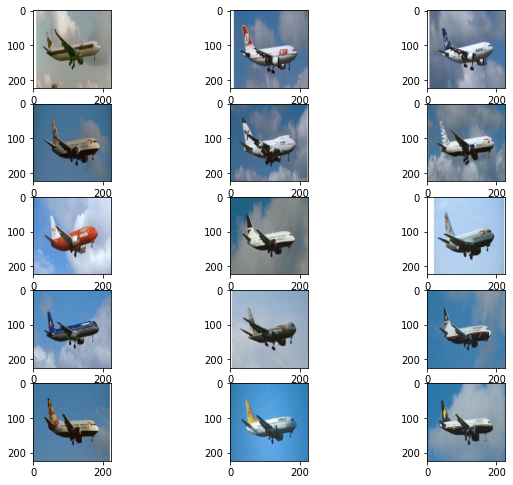

In [ ]:
get_img(train_img, 15, 1)